In [40]:
mismatch_no = 0
match_no = 0
total_gap_count = 0 #total gaps found in the entire sequence 
len_gap_counts = [0 for i in range(1000)]  #stores the counts of gaps based on the length 

In [41]:
def count_gaps(string1):
    
    """
    Parses through a sequence and counts the number of gaps in the given string sequence
    
    Parameters
    ----------
    string1 : str 
        The dna sequence of first species 
 
    """
    
    global total_gap_count
    global len_gap_counts
    continue_gap = False
    gap_len = 0
    
    for i, base in enumerate(string1):
        
        # If gap is encoutered 
        if base == "-":
            
            if (continue_gap) == False:
                total_gap_count = total_gap_count + 1
                continue_gap = True
                gap_len = gap_len + 1
                
            elif (continue_gap) == True:
                gap_len = gap_len + 1
                   
        else:
            if (continue_gap) == True:
                len_gap_counts[gap_len] = (len_gap_counts[gap_len]) + 1
                gap_len = 0        #resets the gap length back to zero
                continue_gap = False
                
    if (continue_gap) == True:
        len_gap_counts[gap_len] = (len_gap_counts[gap_len]) + 1
        gap_len = 0 
        continue_gap = False
        

In [42]:
def compare(string1, string2):
    """
    Compares the individual bases between two sequences of two different species
    Note: This method ignores gaps
    
    Parameters
    ----------
    string1 : str
        The dna sequence of first species 
    string2 : str
        The dna sequence of first species 
    """
    
    global match_no
    global mismatch_no
    
    for i, base in enumerate(string1):
        
        if (string1[i].isalpha() == False) or (string2[i].isalpha() == False):
            continue 
            
        else:
            
            if string1[i] == string2[i]:  #Basepair match, increase match count
                match_no = match_no + 1
                
            elif string1[i] != string2[i]:  #Basepair mismatch, increase the msimatch count
                mismatch_no = mismatch_no + 1     

In [43]:
def compute_gap_rate(gap_no, match_no, mismatch_no):
    
    """
    Computes the total gap rate between two species given the sequence information
    
    Parameters
    ----------
    gap_no : integer 
        The total number of gaps present in the entire file
        
    match_no : integer 
        The total number of matches present in the sequence file
        
    mismatch_no : integer 
        The total number of matches present in the sequence file
        
    ----------
    return: the gap rate between the two species 
 
    """
    
    gap_rate = gap_no / (match_no + mismatch_no + gap_no)
    
    return gap_rate

In [52]:
def read_and_compare(filename):

    """
    Reads each line in the file and extracts the lines corresponding to dna sequences 
    compares these sequences using the compare method. 
    
    Parameters
    ----------
    filename : str
        The maf file containing the sequences 
    """
    okay = False
    with open(filename) as f:
        while True:
            okay = False
            try:
                line_1 = next(f)

                if line_1[0] == "s":
                    human = line_1.split()[-1].upper()
                    count_gaps(human)
                    

                    line_2 = next(f)
                    chimp = chimp = line_2.split()[-1].upper()
                    count_gaps(chimp)

                    compare(chimp,human)
                okay = True

            except StopIteration:
                break  # End of file.

In [45]:
def display(len_gap_counts):
    
    """
    Displays the counts for each individual gap length encountered in the file
    
    Parameters
    ----------
    len_gap_counts : list/matrix 
        Contains the counts of the individual gap lengths in the sequences 
    """
    
    print('{:<13}'.format("Gap Length"), '{:<7}'.format("Count"), '{:>13}'.format("Gap Frequency"))
    for i, items in enumerate(len_gap_counts):
        if items != 0:
            print('{:<13}'.format(i), '{:<7}'.format(items), '{:<13}'.format(round(items/sum(len_gap_counts), 4)))

In [46]:
read_and_compare("chimp.maf")

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [48]:
plot_data = {}

In [49]:
for i, count in enumerate(len_gap_counts):
    if count != 0:
        plot_data[i] = count/sum(len_gap_counts)

In [50]:
keys = plot_data.keys()
values = plot_data.values()

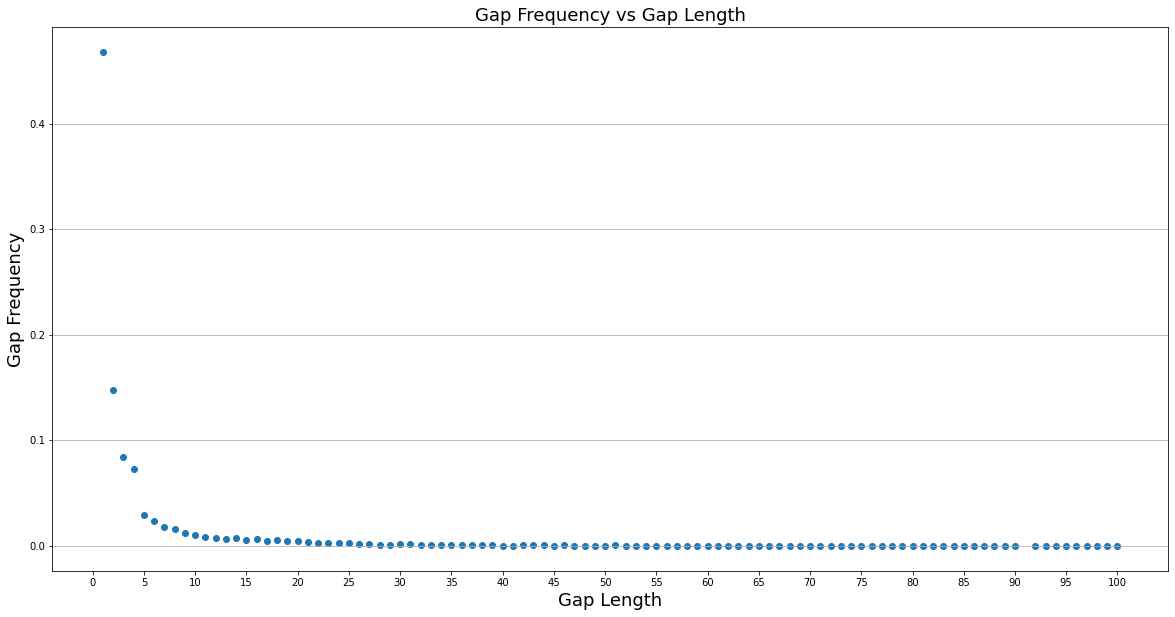

In [51]:
plt.figure(figsize=(20, 10))
plt.scatter(keys, values)
plt.xlabel('Gap Length', fontsize=18)
plt.ylabel('Gap Frequency', fontsize=18)
plt.xticks(np.arange(0, 105, 5))
plt.title("Gap Frequency vs Gap Length", fontsize=18)
plt.grid(axis = "y")
plt.show()

In [27]:
plot_data.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 110, 111, 113, 114, 115, 116, 118, 119, 120, 121, 123, 124, 130, 135, 136, 137, 138, 140, 141, 168, 178, 227])

In [75]:
display(len_gap_counts)

Gap Length    Count   Gap Frequency
1             161478  0.3281       
2             71950   0.1462       
3             47915   0.0973       
4             37365   0.0759       
5             24485   0.0497       
6             18824   0.0382       
7             15030   0.0305       
8             12845   0.0261       
9             11044   0.0224       
10            9455    0.0192       
11            8115    0.0165       
12            7086    0.0144       
13            6365    0.0129       
14            5558    0.0113       
15            5038    0.0102       
16            4412    0.009        
17            3698    0.0075       
18            3403    0.0069       
19            2938    0.006        
20            2823    0.0057       
21            2451    0.005        
22            2166    0.0044       
23            2043    0.0042       
24            1799    0.0037       
25            1711    0.0035       
26            1345    0.0027       
27            1346    0.0027